In [1]:
import warnings

import pandas as pd
from progress.bar import Bar
from gensim.models.hdpmodel import HdpModel

import topic_modelling as tm

In [2]:
# Disable any warnings that appear
warnings.filterwarnings('ignore')

In [3]:
# Define range of topics to analyse
MIN_TOPICS: int = 5
MAX_TOPICS: int = 21

In [4]:
# Retrieve data from the dataset
df = pd.read_csv('resources/bbc-news-data.csv', sep='\t')
data = df.content.values.tolist()

In [5]:
# Perform data preprocessing
data, id2word, corpus = tm.preprocess_data(data)

In [6]:
# Collect results
results = {
    'topic': [],
    'coherence': [],
    'model': []
}

with Bar('HDP', min=MIN_TOPICS, max=MAX_TOPICS, check_tty=False) as bar:
    bar.next(n=MIN_TOPICS) # Start at mininum topic

    for i in range(MIN_TOPICS, MAX_TOPICS):
        # Execute model
        model = HdpModel(corpus=corpus, id2word=id2word, T=i)

        # Calculate coherence
        coherence_score = tm.calculate_coherence(model, data, id2word)

        # Append to results
        results['topic'].append(i)
        results['coherence'].append(coherence_score)
        results['model'].append(model)
        bar.next()

HDP |################################| 21/21


In [7]:
# Convert results to dataframe
df = pd.DataFrame(results)

In [8]:
# Export the dataframe
export_df = df.drop(['model'], axis=1)
export_df.to_excel('results/results_hdp.xlsx', sheet_name='HDP', index=False)

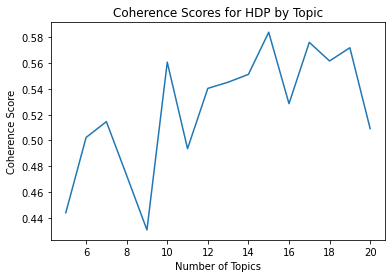

In [9]:
# Plot the results
tm.graph_results(
    'Coherence Scores for HDP by Topic',
    df['topic'].tolist(),
    df['coherence'].tolist()
)

In [10]:
# Calculate additional information
max_result = df[df['coherence'] == max(df['coherence'])]
best_coherence = float(max_result['coherence'])
best_topic = int(max_result['topic'])
best_model = max_result['model'].item()
mean = round(sum(df['coherence']) / len(df), 2)

print(f'Highest coherence score was {best_coherence} from {best_topic} topics')
print(f'Average coherence score for HDP is {mean}')

Highest coherence score was 0.5838582747647005 from 15 topics
Average coherence score for HDP is 0.52


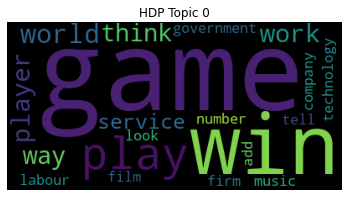

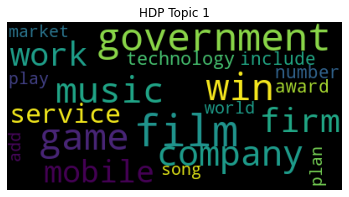

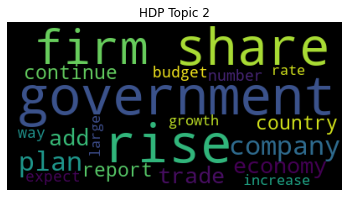

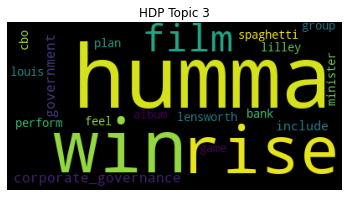

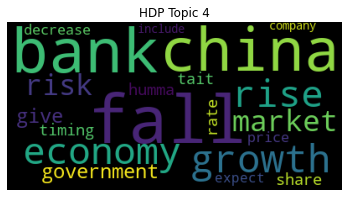

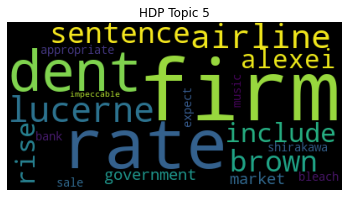

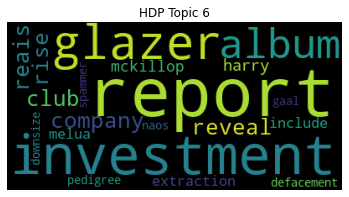

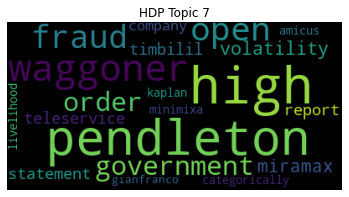

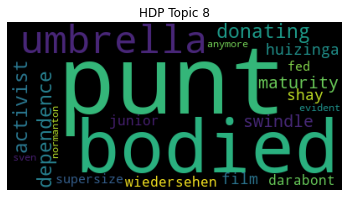

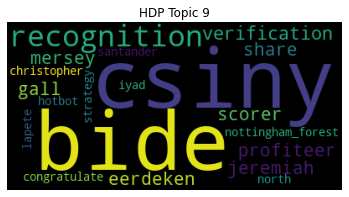

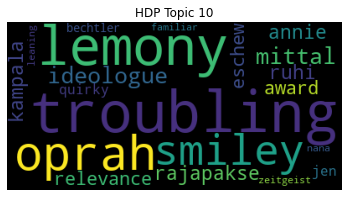

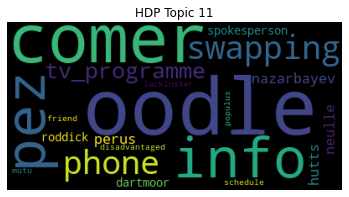

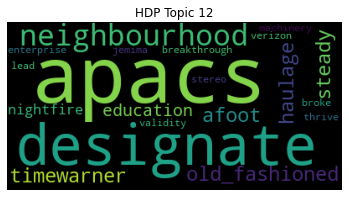

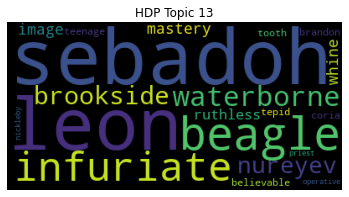

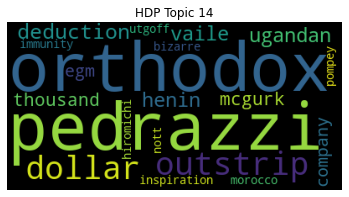

In [11]:
# Create wordclouds for HDP
for i, topic in best_model.show_topics(formatted=False):
    tm.form_wordcloud(f'HDP Topic {i}', topic)

In [12]:
# Assign labels to topics if possible
labels = {}

for i, topic in best_model.show_topics(formatted=False, num_words=5):
    print(f'LDA Topic {i}: ', end='')
    print(' '.join([word for word, _ in topic]))
    label = input('\tEnter topic label: ')
    labels[i] = label
    print()

LDA Topic 0: game win play world work


	Enter topic label:  



LDA Topic 1: film government game win music


	Enter topic label:  entertainment



LDA Topic 2: government rise share firm company


	Enter topic label:  business



LDA Topic 3: humma win rise film corporate_governance


	Enter topic label:  



LDA Topic 4: fall bank china growth economy


	Enter topic label:  business



LDA Topic 5: firm rate dent lucerne airline


	Enter topic label:  business



LDA Topic 6: report investment glazer album company


	Enter topic label:  business



LDA Topic 7: high pendleton waggoner open fraud


	Enter topic label:  



LDA Topic 8: punt bodied umbrella donating activist


	Enter topic label:  



LDA Topic 9: csiny bide recognition verification profiteer


	Enter topic label:  



LDA Topic 10: troubling lemony oprah smiley ideologue


	Enter topic label:  



LDA Topic 11: oodle comer info pez swapping


	Enter topic label:  



LDA Topic 12: apacs designate neighbourhood old_fashioned haulage


	Enter topic label:  



LDA Topic 13: sebadoh leon beagle infuriate waterborne


	Enter topic label:  



LDA Topic 14: orthodox pedrazzi outstrip dollar deduction


	Enter topic label:  


In [13]:
# Perform quantitative analysis on qualitative results
total_unlabelled = len([s for _, s in labels.items() if not len(s)])
unlabelled_percent = round((total_unlabelled / len(labels)) * 100)
print(f'Total topics unlabelled for NMF: {unlabelled_percent}%')

all_labels = set([s for _, s in labels.items() if s])
covered_labels = len([s for s in all_labels if s in tm.DEFAULT_LABELS])
covered_percent = round((covered_labels / len(tm.DEFAULT_LABELS)) * 100) 
print(f'Total label coverage for NMF: {covered_percent}%')

Total topics unlabelled for NMF: 67%
Total label coverage for NMF: 40%
